In [1]:
import networkx as nx
gB = nx.read_graphml('../Session_1/gB.graphml')
gD = nx.read_graphml('../Session_1/gD.graphml')

In [2]:
# calculate the number of weakly and strongly connected components in gB
num_weakly_connected_gB = nx.number_weakly_connected_components(gB)
num_strongly_connected_gB = nx.number_strongly_connected_components(gB)

# calculate the number of weakly and strongly connected components in gD
num_weakly_connected_gD = nx.number_weakly_connected_components(gD)
num_strongly_connected_gD = nx.number_strongly_connected_components(gD)

# print the results
print(f"gB - Number of weakly connected components: {num_weakly_connected_gB}")
print(f"gB - Number of strongly connected components: {num_strongly_connected_gB}")
print(f"gD - Number of weakly connected components: {num_weakly_connected_gD}")
print(f"gD - Number of strongly connected components: {num_strongly_connected_gD}")

gB - Number of weakly connected components: 1
gB - Number of strongly connected components: 372
gD - Number of weakly connected components: 1
gD - Number of strongly connected components: 393


In [3]:
gB_undirected = nx.read_graphml('gBp.graphml')
gD_undirected = nx.read_graphml('gDp.graphml')

In [4]:
# calculate the number of weakly and strongly connected components in gB
num_connected_gB_undirected = nx.number_connected_components(gB_undirected)

# calculate the number of weakly and strongly connected components in gD
num_connected_gD_undirected = nx.number_connected_components(gD_undirected)

# print the results
print(f"gB - Number of weakly connected components: {num_connected_gB_undirected}")
print(f"gD - Number of weakly connected components: {num_connected_gD_undirected}")


gB - Number of weakly connected components: 1
gD - Number of weakly connected components: 1


In [5]:
gw = nx.read_graphml('gw.graphml')

# get the edge weights as a dictionary
edge_weights = nx.get_edge_attributes(gw, 'weight')

# find the two most similar artists
most_similar_artists = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:2]
print("Most similar artists:")
for edge, weight in most_similar_artists:
    print(f"Artist {edge[0]} and Artist {edge[1]} with similarity {weight}")

# find the two least similar artists
least_similar_artists = sorted(edge_weights.items(), key=lambda x: x[1])[:2]
print("Least similar artists:")
for edge, weight in least_similar_artists:
    print(f"Artist {edge[0]} and Artist {edge[1]} with similarity {weight}")

Most similar artists:
Artist 4A6cd63FWHbCLqk9mtGUZZ and Artist 4uBD3fsHzb3IpOTGpicsbH with similarity 1.0
Artist 4npEfmQ6YuiwW1GpUmaq3F and Artist 6wPhSqRtPu1UhRCDX5yaDJ with similarity 0.8966825810592454
Least similar artists:
Artist 1tFnKlJuDU1PvvvkEx9mi7 and Artist 6wJwDO5lR0bhd9E9upRJOK with similarity 0.007906316875107134
Artist 1tFnKlJuDU1PvvvkEx9mi7 and Artist 6sa5JC8xdrw2ZpGQ50nVCW with similarity 0.008662372864532343


In [6]:
import networkx as nx

# Load the graph from the GraphML file
gw = nx.read_graphml('gw.graphml')

# Find the connected components
connected_components = list(nx.connected_components(gw))

# Find the largest connected component
largest_component = max(connected_components, key=len)

# Create a subgraph from the largest connected component
largest_component_graph = gw.subgraph(largest_component)

print("Largest connected component has", len(largest_component), "nodes and", largest_component_graph.number_of_edges(), "edges.")

Largest connected component has 656 nodes and 214840 edges.


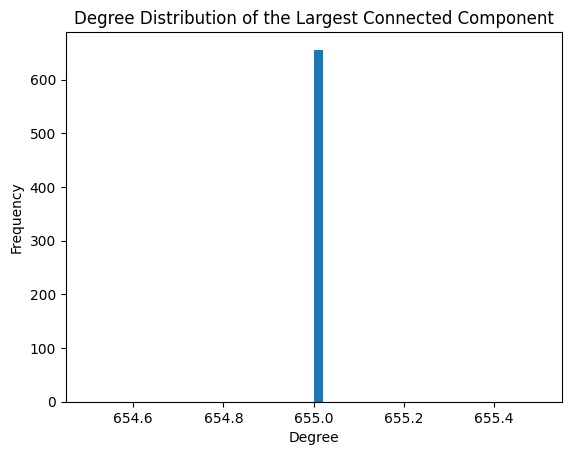

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from the GraphML file
gw = nx.read_graphml('gw.graphml')

# Find the connected components
connected_components = list(nx.connected_components(gw))

# Find the largest connected component
largest_component = max(connected_components, key=len)

# Create a subgraph from the largest connected component
largest_component_graph = gw.subgraph(largest_component)

# Calculate the degree of each node
degrees = [d for n, d in largest_component_graph.degree()]

# Plot the degree distribution
plt.hist(degrees, bins=50)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Largest Connected Component')
plt.show()

In [8]:
def prune_low_weight_edges(g: nx.Graph, min_weight=None, min_percentile=None, out_filename: str = None) -> nx.Graph:
    """
    Prune a graph by removing edges with weight < threshold. Threshold can be specified as a value or as a percentile.

    :param g: a weighted networkx graph.
    :param min_weight: lower bound value for the weight.
    :param min_percentile: lower bound percentile for the weight.
    :param out_filename: name of the file that will be saved.
    :return: a pruned networkx graph.
    """
    if (min_weight is None and min_percentile is None) or (min_weight is not None and min_percentile is not None):
        raise ValueError("Exactly one of min_weight or min_percentile must be specified")

    pruned_graph = g.copy()

    if min_weight is not None:
        threshold = min_weight
    else:
        weights = [edata['weight'] for u, v, edata in g.edges(data=True)]
        threshold = np.percentile(weights, min_percentile)

    edges_to_remove = [(u, v) for u, v, edata in pruned_graph.edges(data=True) if edata['weight'] < threshold]
    pruned_graph.remove_edges_from(edges_to_remove)

    pruned_graph.remove_nodes_from([node for node, degree in pruned_graph.degree() if degree == 0])

    if out_filename is not None:
        nx.write_graphml(pruned_graph, out_filename)

    return pruned_graph

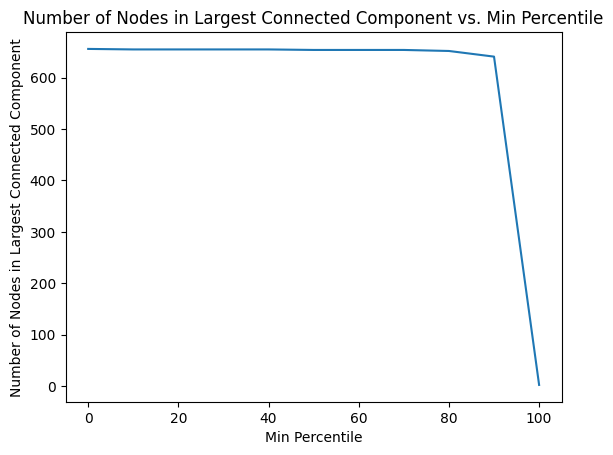

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def prune_and_plot(g, min_percentile_range):
    node_counts = []
    for min_percentile in min_percentile_range:
        pruned_graph = prune_low_weight_edges(g, min_percentile=min_percentile)
        connected_components = list(nx.connected_components(pruned_graph))
        largest_component = max(connected_components, key=len)
        node_counts.append(len(largest_component))

    plt.plot(min_percentile_range, node_counts)
    plt.xlabel('Min Percentile')
    plt.ylabel('Number of Nodes in Largest Connected Component')
    plt.title('Number of Nodes in Largest Connected Component vs. Min Percentile')
    plt.show()

# Example usage:
gw = nx.read_graphml('gw.graphml')
min_percentile_range = range(0, 101, 10)  # Prune edges with weights below the 0th, 10th, ..., 100th percentile
prune_and_plot(gw, min_percentile_range)